In [1]:
from tdc.single_pred import ADME
import pandas as pd


In [2]:
# Load dataset

from tdc.single_pred import ADME
data = ADME(name = 'HIA_Hou')
split = data.get_split()

Downloading...
100%|██████████| 40.1k/40.1k [00:00<00:00, 947kiB/s]
Loading...
Done!


In [3]:
template = """### Instructions: Answer the following question about drug properties. 
### Context: When a drug is orally administered, it needs to be absorbed from the human gastrointestinal system into the 
bloodstream of the human body. This ability of absorption is called human intestinal absorption (HIA) and it is crucial for a drug to be delivered to the target
### Question: Given a drug SMILES string, predict whether it 
(A) the drug is absorbed to the bloodstream (B) the drug is not absorbed to the bloodstream.
SMILES: {} 
### Answer: {}"""


In [4]:
split["train"].head()

,Drug_ID,Drug,Y
0,Acetanilide,CC(=O)Nc1ccccc1,1
1,Acetazolamide.mol,CC(=O)Nc1nnc(S(N)(=O)=O)s1,1
2,Aminopyrine,Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C,1
3,Amosulalol.mol,COc1ccccc1OCCNC[C@@H](O)c1ccc(C)cc1S(N)(=O)=O,1
4,Bendroflumethiazide.mol,NS(=O)(=O)c1cc2c(cc1C(F)(F)F)N[C@H](Cc1ccccc1)...,1


In [5]:
# process dataset

def formatting_prompts_func(examples):
    drugs = examples["Drug"]
    outputs       = examples["Y"]
    texts = []
    token_sizes = []
    for instruction, output in zip(drugs, outputs):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = template.format(instruction, "(A)" if output else "(B)")
        texts.append(text)
        token_sizes.append(len(text))
    return { "text" : texts, "drugs":drugs, "outputs":outputs, "token_size":token_sizes, "ds_ident":"ADME_PAMPA_NCATS"}

def formatting_prompts_func_test(examples):
    drugs = examples["Drug"]
    outputs       = examples["Y"]
    texts = []
    token_sizes = []
    for instruction, output in zip(drugs, outputs):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = template.format(instruction, "(A)" if output else "(B)")
        texts.append(text)
        token_sizes.append(len(text))
    return { "text" : texts, "drugs":drugs, "outputs":outputs, "token_size":token_sizes, "ds_ident":"ADME_PAMPA_NCATS"}

In [6]:
train_dataset = formatting_prompts_func(split["train"])
valid_dataset = formatting_prompts_func_test(split["valid"])
test_dataset = formatting_prompts_func_test(split["test"])

<Axes: >

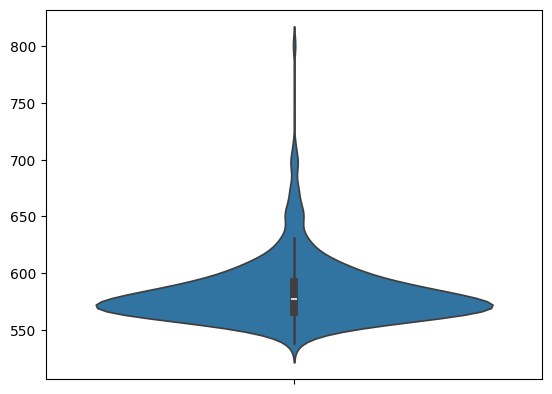

In [7]:
import seaborn as sns

sns.violinplot(train_dataset["token_size"])

In [8]:
len(train_dataset["text"]), len(valid_dataset["text"]), len(test_dataset["text"])

(404, 58, 116)

In [9]:
import pickle
import os


def dump_file(obj, path, file_name):
    os.makedirs(path, exist_ok=True)
    file_name = os.path.join(path,file_name)
    with open(file_name, "wb") as f0:
        pickle.dump(obj,f0)

In [10]:
dump_file(train_dataset, "processed", "train.pkl")
dump_file(valid_dataset, "processed", "valid.pkl")
dump_file(test_dataset, "processed", "test.pkl")